In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_dense_adj
from torch_geometric.transforms import NormalizeFeatures
from nn import GCN

In [17]:
# create the adjaceny matrix from the edge index
def create_adj(edge_index, num_nodes):
    # edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    adj = np.zeros((num_nodes, num_nodes), dtype=int)
    for i, j in edge_index:
        adj[i-1, j-1] = 1
        adj[j-1, i-1] = 1
    
    adj = torch.tensor(adj, dtype=torch.float) + torch.eye(num_nodes)
    return adj

data = np.loadtxt("ucidata-zachary/out.ucidata-zachary", dtype=int, skiprows=2)

num_nodes = 34
features_dim = 2
adj = create_adj(data, num_nodes)

# initialize random features
# features = torch.randn(num_nodes, 2)

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
labels = [0 if i in labels else 1 for i in range(num_nodes)]
labels = torch.tensor(labels, dtype=torch.long)

In [18]:
# model and optimizer
model = GCN(nin=features_dim, nout=16, nhid=16, nclass=2, num_nodes=num_nodes)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [33]:
# train the model
model.train()
for epoch in range(10000):
    optimizer.zero_grad()
    output = model(adj)           # n x 2
    loss = F.cross_entropy(output, labels)  # for each node, cross entropy loss compares the probability of the labels to the true label
    loss.backward()
    optimizer.step()

    print(f"Epoch: {epoch}, Loss: {loss.item()}")



Epoch: 0, Loss: 1.696428626019042e-05
Epoch: 1, Loss: 1.6936244719545357e-05
Epoch: 2, Loss: 1.689768396317959e-05
Epoch: 3, Loss: 1.686613541096449e-05
Epoch: 4, Loss: 1.6834588677738793e-05
Epoch: 5, Loss: 1.679953493294306e-05
Epoch: 6, Loss: 1.676798638072796e-05
Epoch: 7, Loss: 1.6732934454921633e-05
Epoch: 8, Loss: 1.6701385902706534e-05
Epoch: 9, Loss: 1.6669837350491434e-05
Epoch: 10, Loss: 1.663829061726574e-05
Epoch: 11, Loss: 1.6603235053480603e-05
Epoch: 12, Loss: 1.6571688320254907e-05
Epoch: 13, Loss: 1.6540139768039808e-05
Epoch: 14, Loss: 1.6508593034814112e-05
Epoch: 15, Loss: 1.647353929001838e-05
Epoch: 16, Loss: 1.6445495930383913e-05
Epoch: 17, Loss: 1.641044218558818e-05
Epoch: 18, Loss: 1.637889363337308e-05
Epoch: 19, Loss: 1.6347345081157982e-05
Epoch: 20, Loss: 1.6315798347932287e-05
Epoch: 21, Loss: 1.6284247976727784e-05
Epoch: 22, Loss: 1.6252701243502088e-05
Epoch: 23, Loss: 1.622115269128699e-05
Epoch: 24, Loss: 1.6193111150641926e-05
Epoch: 25, Loss: 1.6

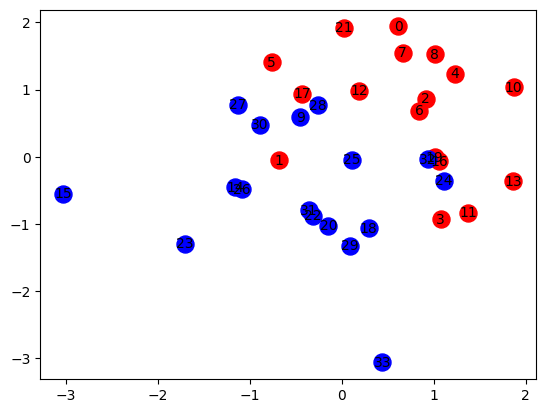

In [34]:
# plot the outputs on a 2D plane
plt.scatter(model.features()[:, 0].detach().numpy(), model.features()[:, 1].detach().numpy())

# if the ith node is labeled 0, color it red, else blue
for i in range(num_nodes):
    if labels[i] == 0:
        plt.scatter(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), color='red', s=150)
    else:
        plt.scatter(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), color='blue', s=150)

# label the nodes, centered
for i in range(num_nodes):
    plt.text(model.features()[i, 0].detach().numpy(), model.features()[i, 1].detach().numpy(), str(i), ha='center', va='center')

plt.show()